# Pymaceuticals Inc.
---

### Analysis
# Analysis of tumor volume versus the number of days for mouse r944 treated with Capomulin shows that capomulin may be affective in reducing tumor volume. In the graph we see that mouse r944 has a tumor volume of 45mm at day 1. Over the next 20 days we see that tumor volume increases to 48mm. After day 20 we then see a decrease in the tumor volume over the next 15 days.

# The data in the correlation and regression graph demonstrates that there is a positive regression between the weight of a mouse and the average tumor volume for mice taking Capomulin. The correlation is strong because absolute value of r has a correlation coefficient of .84. 

# An analysis of the box plot which demonstartes the distribution of the tumor volume for each treament shows capomulin is a more effective treatment than infubinol and ceftamin. The graph displays the tumor volume outliers for infubinol and ceftmin which is less then 45mm. Infubinol has an outlier of 36.32 demonstrating its lack of effectivness in reducing tumor volume. 
 

In [239]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata_df, study_results_df, how="right", on = "Mouse ID")
# Display the data table for preview
combined_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [141]:
# Checking the number of mice.
number_of_mice= combined_study_data["Mouse ID"].value_counts()
Total_Mice = len(number_of_mice)
Total_Mice

249

In [240]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data.loc[combined_study_data.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [241]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_study_data.loc[combined_study_data["Mouse ID"]=="g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [242]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study_data[combined_study_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [243]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=clean_df["Mouse ID"].value_counts()
mice_total = len(new_mouse_count) 
print(mice_total)

248


## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# calculate the mean, variance, standard deviation, and SEM
stats_df = combined_study_data.groupby("Drug Regimen")


average_regimen= stats_df["Tumor Volume (mm3)"].mean()
average_regimen

median_regimen=stats_df["Tumor Volume (mm3)"].median()

variance_regimen= stats_df["Tumor Volume (mm3)"].var()
variance_regimen

standard_deviation_regimen= stats_df["Tumor Volume (mm3)"].std()
standard_deviation_regimen

SEM_regimen= stats_df["Tumor Volume (mm3)"].sem()

results_df= pd.DataFrame({"Mean Tumor Volume":average_regimen, 
                         "Median Tumor Volume":median_regimen,
                         "Tumor Volume Variance":variance_regimen,
                         "Tumor Volume Std. Dev.":standard_deviation_regimen,
                         "Tumor Volume Std. Err.":SEM_regimen})
results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [210]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Sum_stats = combined_study_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
Sum_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

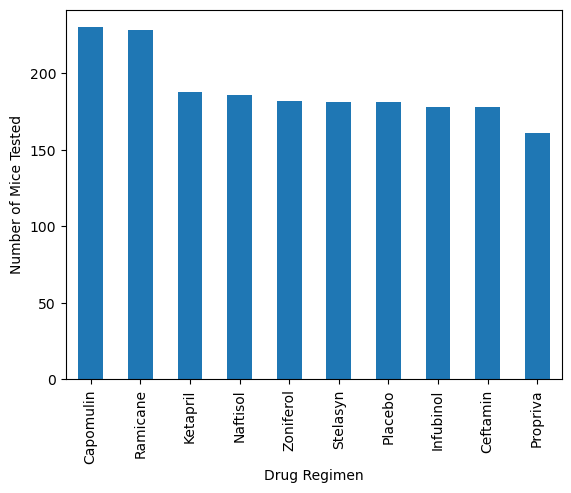

In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count = combined_study_data["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()




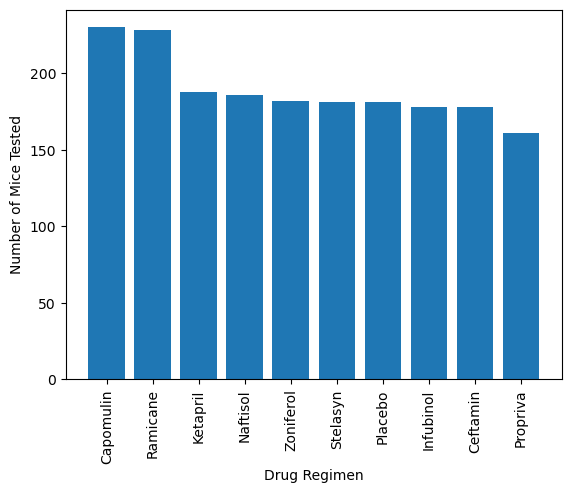

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_count = combined_study_data["Drug Regimen"].value_counts()
plt.bar(mouse_count.index.values,mouse_count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()


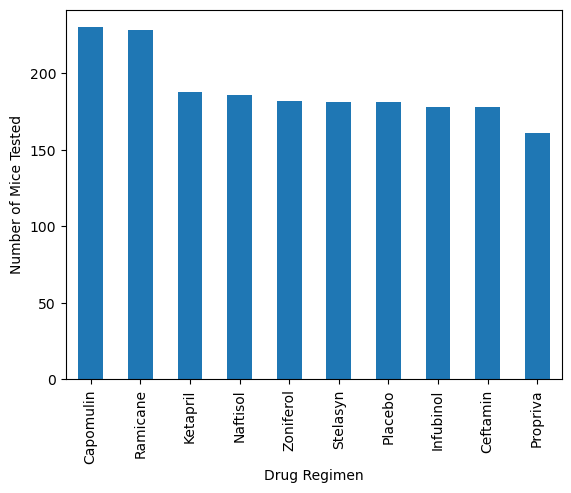

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = combined_study_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()




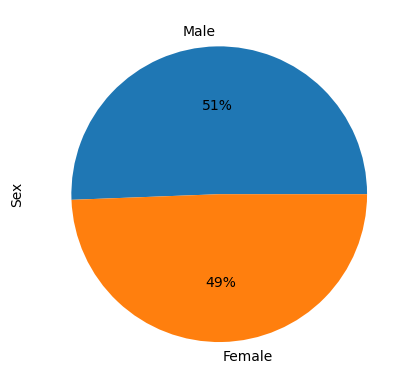

In [235]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_counts = clean_df["Sex"].value_counts()
mouse_counts.plot(kind="pie",autopct="%1.0f%%")
plt.show()


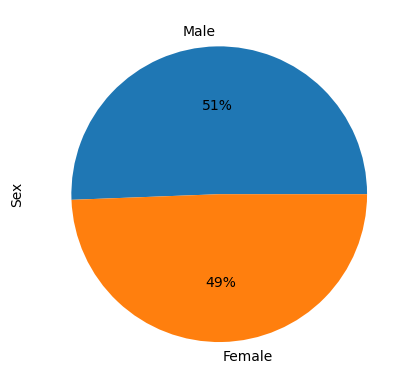

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate percent number of males
mouse_counts = clean_df["Sex"].value_counts()
plt.pie(mouse_counts.values, labels=mouse_counts.index.values, autopct="%1.0f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [173]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse= combined_study_data.groupby("Mouse ID")["Timepoint"].max()
max_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_mouse= pd.merge(combined_study_data,max_mouse, how="right", on=["Mouse ID","Timepoint"])
print(merge_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       ...          ...     ...         ...         ...        ...   
244     z435     Propriva  Female          12          26         10   
245     z578     Ramicane    Male          11          16         45   
246     z581    Infubinol  Female          24          25         45   
247     z795     Naftisol  Female          13          29         45   
248     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [204]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row_vol_data= merge_mouse.loc[merge_mouse["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(row_vol_data)
    
    # Determine outliers using upper and lower bounds
    quartiles=row_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_treatments= row_vol_data.loc[(row_vol_data < lower_bound) | 
                                          (row_vol_data > upper_bound)]
    
    print(f"{i}'s potential outliers:{outlier_treatments}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


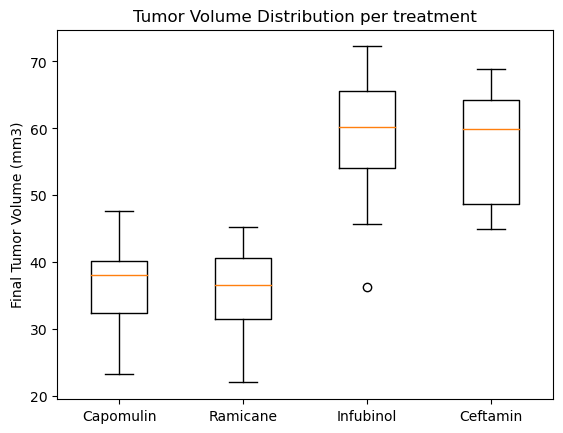

In [228]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1= plt.subplots()
ax1.set_title("Tumor Volume Distribution per treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4],["Capomulin", "Ramicane","Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

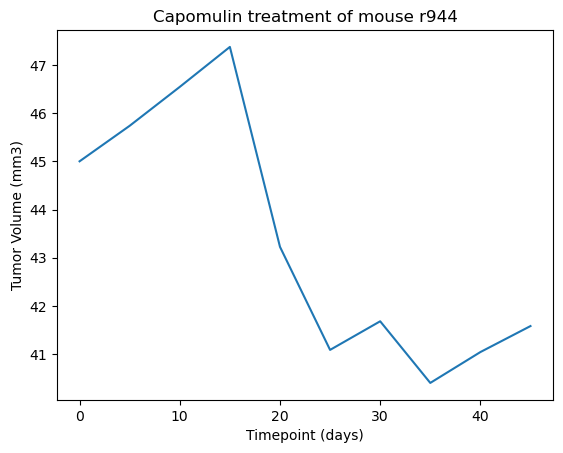

In [118]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_info = combined_study_data.loc[combined_study_data["Drug Regimen"]=="Capomulin"]
drug_info

mouse_info = drug_info.loc[combined_study_data["Mouse ID"]=="r944"]
x_axis_data = mouse_info["Timepoint"]
y_axis_data = mouse_info["Tumor Volume (mm3)"]

plt.plot(x_axis_data, y_axis_data)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse r944")
plt.show()


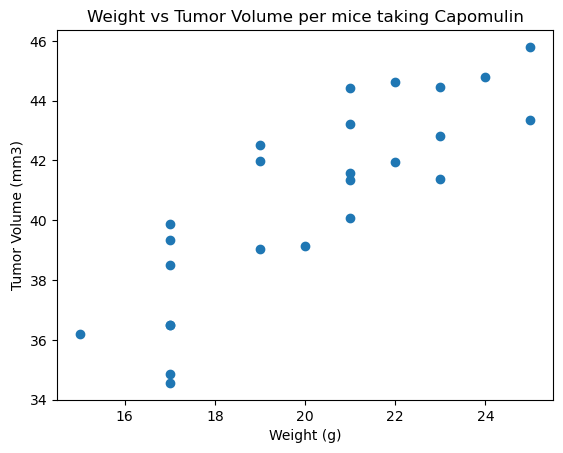

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_info = combined_study_data.loc[combined_study_data["Drug Regimen"]=="Capomulin"]
drug_info

mouse_weight = drug_info.groupby("Mouse ID")["Weight (g)"].mean()
mouse_tumor = drug_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
x_axis = mouse_weight
y_axis = mouse_tumor
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume per mice taking Capomulin")
plt.show()

## Correlation and Regression

The correlation coeffcient between mouse weight and average tumor volume is 0.84


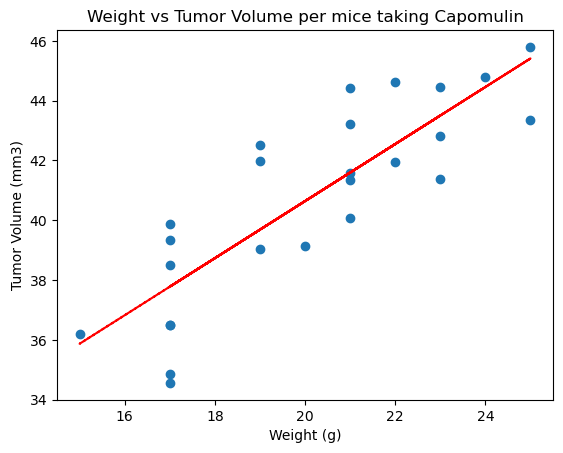

In [247]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coeffcient between mouse weight and average tumor volume is {round( st.pearsonr(mouse_weight,mouse_tumor)[0],2)}")
# Set a linear regression on mouse weight vs Tumor Volume
reg_slope, reg_int, reg_r, reg_p, reg_std_err = st.linregress(mouse_weight, mouse_tumor)

# Calculate weight vs tumor volume by creating an equation of line
reg_line = reg_slope * mouse_weight + reg_int

# for mouse weight and average tumor volume for the Capomulin regimen

drug_info = combined_study_data.loc[combined_study_data["Drug Regimen"]=="Capomulin"] 
drug_info

mouse_weight = drug_info.groupby("Mouse ID")["Weight (g)"].mean()
mouse_tumor = drug_info.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
x_axis = mouse_weight
y_axis = mouse_tumor
plt.scatter(x_axis,y_axis)
plt.plot(mouse_weight,reg_line,"r--")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume per mice taking Capomulin")
plt.show()
